# Classifying Handwritten Digits with Neural Networks¶

![img](https://www.tensorflow.org/images/MNIST.png)

**Learning Objectives:**
  * Train both a linear model and a neural network to classify handwritten digits from the classic [MNIST](http://yann.lecun.com/exdb/mnist/) data set
  * Compare the performance of the linear and neural network classification models
  * Visualize the weights of a neural-network hidden layer

#### Our goal is to map each input image to the correct numeric digit. We will create a NN with a few hidden layers and a Softmax layer at the top to select the winning class.

### how do you we supply image to nueron?
- its ultimately a two dimensional matrix where each pixels represent as number between 0 to 255(color intensity)
- 0 --> black  , 255-->white 



<img src="image1.png">

<img src="image2.jpg">

- here we will use 10 neurons because our target function is classified into 0 to 9 nominal data.
- since we are using sigmoid function output will be between 0 to 1.
- input image will classify into one of the target labels.

1. we supply this image to 2D array 
2. 2D --> 1D flattened array
3. Each pixel will input to each neuron x1->0,x2->0....x784->0 here we have 784 features that act as the first layer of the Neural Network.
4. we can add hidden layers to improve the model accuracy
5. The output layer has 10 neurons because our target function is classified into 0 to 9 nominal data.
6. since we are using sigmoid function output will be between 0 to 1.
7. input image will classify into one of the target labels according to maximum of all output ,here image is predicted as 
   digit 2 with the highest value of sigmoid function =0.92







## Setup

- firstly,load dataset.Keras automatically provides with many datasets in which one of them is the mnist handwritten digits dataset.
- import keras and openCV utility libraries


In [2]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sb
import keras
import tensorflow as tf


### split the given dataset into train and test set

In [3]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

### visualize some of the image of dataset

5


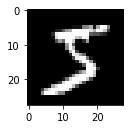

0


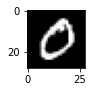

4


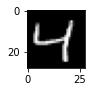

1


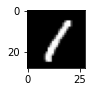

9


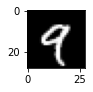

In [4]:

plt.figure(figsize=(10,10))
j=0
for i in range (0,len(X_train[:5])):
         j+=1
         plt.subplot(1,5,j)
         plt.imshow(X_train[i], cmap="gray")
         print (y_train[i])
         plt.show()
  
    
    
    
    


In [5]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [6]:
#scalling of dataset between 0 to 1
X_train=X_train/255
X_test=X_test/255

- the training set consists of 60,000 images 
- the test set consists the rest of the 10,000 images which is a very right fit considering the training.
 

In [7]:
#flatten the traing and tesing dataset to 28x28 dimension
X_train_flattened = X_train.reshape(60000, 28*28)
X_test_flattend = X_test.reshape(10000, 28*28)

In [8]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)


In [9]:
X_test_flattend.shape

(10000, 784)

### Model Building

In [10]:
#define model


model = Sequential([keras.layers.Flatten(input_shape=(28,28)), # adding flatten function that flatten the 2D -> 1D array,
                 keras.layers.Dense(10,activation='sigmoid') # first input layer of NN
                   ])
                 



In [11]:
#compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#fit model
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7148 - accuracy: 0.8185
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3093 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2851 - accuracy: 0.9218
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2812 - accuracy: 0.9215
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9244


In [13]:
model.evaluate(X_test_flattend,y_test) 


313/313 [==============================] - 1s 1ms/step - loss: 0.2656 - accuracy: 0.9278


[0.2656090259552002, 0.9277999997138977]

## model is giving 92.5% accuracy

## Add layers to the model to increase the accuracy

In [14]:
#define model


model = Sequential([keras.layers.Flatten(input_shape=(28,28)), # adding flatten function that flatten the 2D -> 1D array,
                 keras.layers.Dense(100,activation='relu'),
                keras.layers.Dense(10,activation='sigmoid')# first input layer of NN
                   ])
                 
#compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



#fit model
model.fit(X_train_flattened, y_train, epochs=5) #1 epoch -> One iteration/cycle of the dataset throughout the Neural Network

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4475 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1404 - accuracy: 0.9591
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0923 - accuracy: 0.9716
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0703 - accuracy: 0.9782
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0512 - accuracy: 0.9843


In [15]:
model.evaluate(X_test_flattend,y_test) 

313/313 [==============================] - 1s 3ms/step - loss: 0.0960 - accuracy: 0.9705


[0.09598998725414276, 0.9704999923706055]

##  after adding layers model is giving 97.22% accuracy

In [16]:
model.predict(X_test_flattend)  #model prediction

array([[1.9951761e-03, 1.1360347e-03, 9.8103219e-01, ..., 9.9999863e-01,
        2.2086337e-01, 5.1420480e-02],
       [3.7890905e-01, 9.6178043e-01, 9.9999946e-01, ..., 1.3105946e-06,
        8.3164656e-01, 3.9313823e-09],
       [4.3050647e-03, 9.9970496e-01, 7.7013761e-01, ..., 8.5849392e-01,
        1.6490102e-01, 8.9037418e-04],
       ...,
       [1.0135877e-06, 4.3977129e-06, 8.3463601e-05, ..., 9.4122648e-01,
        1.4029622e-01, 9.9686730e-01],
       [3.9274484e-02, 4.9745842e-05, 5.4213405e-04, ..., 3.9206833e-02,
        7.9168868e-01, 1.5950203e-04],
       [1.2275323e-01, 1.1941029e-05, 4.8198062e-01, ..., 1.0022292e-06,
        7.0142150e-03, 9.6700525e-05]], dtype=float32)

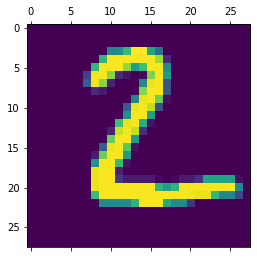

In [17]:
plt.matshow(X_test[1])

In [18]:
y_predicted=model.predict(X_test_flattend)
y_predicted[1]

array([3.7890905e-01, 9.6178043e-01, 9.9999946e-01, 9.1826665e-01,
       4.0968930e-11, 8.2583874e-01, 4.9054027e-03, 1.3105946e-06,
       8.3164656e-01, 3.9313823e-09], dtype=float32)

In [19]:
np.argmax(y_predicted[1])


2

In [20]:
y_predicted_label=[np.argmax(i) for i in  y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## confusion matrix indicates the misclassification of data


In [22]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    4,    0,    1,    2,    6,    2,    0,    2],
       [   0, 1125,    4,    0,    0,    1,    1,    1,    3,    0],
       [   1,    0, 1018,    3,    1,    0,    2,    6,    1,    0],
       [   0,    0,    4,  984,    0,   10,    0,    7,    2,    3],
       [   1,    0,    6,    1,  957,    0,    2,    5,    0,   10],
       [   2,    0,    0,   11,    1,  871,    4,    1,    2,    0],
       [   5,    3,    4,    1,    2,   11,  931,    0,    1,    0],
       [   1,    3,   10,    0,    1,    0,    0, 1012,    0,    1],
       [   7,    3,   14,   14,    5,   12,    4,   14,  897,    4],
       [   1,    5,    0,   12,   11,    6,    1,   22,    4,  947]])>

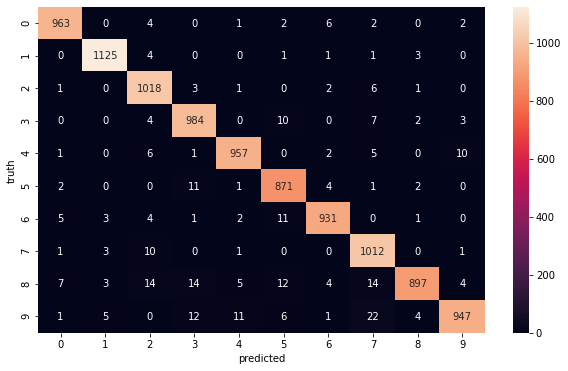

In [23]:
#visulatization of confusion matrix using heatmap
plt.figure(figsize=(10,6))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

## Running our model on a real image of handwritten digits



### Preprocessing the real life image

-  Convert that image to greyscale
- Binarize(threshold) the greyscaled image in such a way that only the digits in the image are white and rest is black
- Using the binarized image, find contours in the image. Here, contours will provide us the individual digits in the image
- Now, we have the digits. But we have to modify it further in such a way that it becomes a lot more similar to the images present in the training dataset.
- Now, looking at an image in dataset. We can infer that the image has to be of shape (28, 28), it should contain the digit white colored and background black colored, and the digit in the image is not stretched to the boundaries, instead, around the digit, in each of the four sides, there is a 5 pixel region (padding) of black color. (You’’ll understand this fully if you check out any of the image from the dataset).
- So, now for modifying our image, we’ll resize it to (18,18)
- Then, we will add a padding of zeros (black color) of 5 pixels in each direction (top, bottom, left, right).
- So, the final padded image will be of the size (5+18+5, 5+18+5) = (28, 28), which is what we wanted.




----------------Contoured Image--------------------


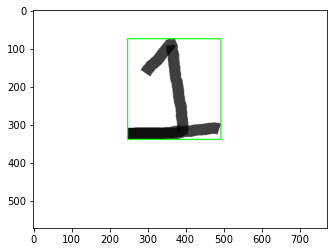

In [56]:
image = cv2.imread('test1.png')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours,b = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

=========PREDICTION============ 




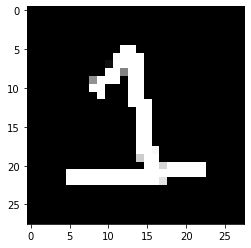



Final Output: 1

Prediction (Softmax) from the neural network:

 [[0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]]


In [57]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    


## Note

#### First output — It prints the ‘softmaxed’ list output consisting of 10 probabilities of the digit fed as input.The highest probability will correspond the predicted digit.

#### Second output — I converted that “softmaxed” list in form where I replaced all the elements with 0 expect the highest probability, which I replaced with 1.(Hard max)

#### Third output — It displays the test image and predicted digit corresponding to it.(image format)